In [84]:
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

def normalization(image):
    return (image - image.min())/(image.max() - image.min())

main = cv2.cvtColor(cv2.imread('./main.png'), cv2.COLOR_BGR2RGB)
aa = np.zeros((306,256,3))
main = cv2.resize(main,(256,256))
aa[50:306,0:256,:] = main
aa = cv2.resize(aa,(256,256))
plt.imshow(main)

sword = np.zeros((2,256,256,3))
hat = np.zeros((2,256,256,3))

index = 0
for root, dirs, files in os.walk('./1'):
    for i in files:
        if(os.path.splitext(i)[-1]=='.png'):
            print(os.path.join(root,i))
            img = cv2.cvtColor(cv2.imread(os.path.join(root,i)), cv2.COLOR_BGR2RGB)
            img = cv2.resize(img,(24,96))
            sword[index,0:96,50:74,:]=normalization(img)
            index += 1


index = 0
for root, dirs, files in os.walk('./2'):
    for i in files:
        if(os.path.splitext(i)[-1]=='.png'):
            print(os.path.join(root,i))
            img = cv2.cvtColor(cv2.imread(os.path.join(root,i)), cv2.COLOR_BGR2RGB)
            print(img.shape)
            img = cv2.resize(img,(60,30))
            hat[index,0:30,70:130,:]=normalization(img)
            index += 1

plt.imshow(sword[1])





error: OpenCV(4.5.3) /private/var/folders/vd/xmbrt83s6nsf3ylvppqms5hc0000gn/T/pip-install-jgf9vvv2/opencv-python_0b929038738340c1a9e21a62e23c6a6d/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [176]:
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

In [373]:
def img_read(num,filepath,height,width,x,y):
    element = np.zeros((num,256,256,3))
    print(element.shape)
    index = 0
    for root, dirs, files in os.walk(filepath):
        for i in files:
            if(os.path.splitext(i)[-1]=='.png'):
                print(os.path.join(root,i))
                img = cv2.cvtColor(cv2.imread(os.path.join(root,i)), cv2.COLOR_BGR2RGB)
                print(img.shape)
                img = cv2.resize(img,(width,height))
                element[index,x:x+height,y:y+width,:]=normalization(img)
                index += 1
    return element

(2, 256, 256, 3)
./1/b_sword.png
(320, 80, 3)
./1/y_sword.png
(320, 80, 3)
(2, 256, 256, 3)
./2/b_hat.png
(92, 270, 3)
./2/y_hat.png
(92, 270, 3)


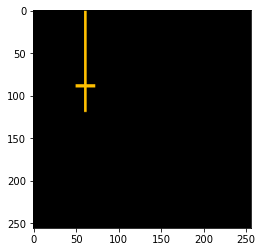

In [377]:
sword = img_read(2,'./1',120,24,0,50)
hat = img_read(2,'./2',40,100,0,80)
plt.imshow(sword[1])

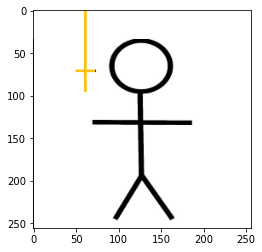

In [412]:
rows,cols,channels = sword[0].shape
roi = main[0:rows,0:cols]
img2gray = cv2.cvtColor(sword[0].astype('float32'),cv2.COLOR_BGR2GRAY)
ret,mask = cv2.threshold(img2gray, 0,255,cv2.THRESH_BINARY)
mask = np.uint8(mask)
mask_inv = cv2.bitwise_not(mask)
#mask_inv = np.uint8(mask_inv)
#mask = normalization(mask)
#img1_bg = sword[0]*mask
roi = sword[1]*255

img1_bg = cv2.bitwise_and(roi,roi,mask = mask)
img2_bg = cv2.bitwise_and(main,main,mask = mask_inv)
img1_bg = np.uint8(img1_bg)
img2_bg = np.uint8(img2_bg)
#print(img2_bg.type)

add = cv2.add(img1_bg,img2_bg)
plt.imshow(add)


In [94]:
def combination(up,down):
    rows,cols,channels = up.shape
    roi = down
    img2gray = cv2.cvtColor(up.astype('float32'),cv2.COLOR_BGR2GRAY)
    ret,mask = cv2.threshold(img2gray, 0.5,255,cv2.THRESH_BINARY)
    mask = np.uint8(mask)
    mask_inv = cv2.bitwise_not(mask)
    roi = up*255
    img1_bg = cv2.bitwise_and(roi,roi,mask = mask)
    img2_bg = cv2.bitwise_and(down,down,mask = mask_inv)
    img1_bg = np.uint8(img1_bg)
    img2_bg = np.uint8(img2_bg)
    add = cv2.add(img1_bg,img2_bg)
    return add

(3, 256, 256, 3)
./1/b_sword.png
(320, 80, 3)
./1/y_sword.png
(320, 80, 3)
./1/g_sword.png
(320, 80, 3)
(3, 256, 256, 3)
./2/b_hat.png
(92, 270, 3)
./2/g_hat.png
(92, 270, 3)
./2/y_hat.png
(92, 270, 3)
(3, 256, 256, 3)
./3/g_shield.png
(224, 224, 3)
./3/b_shield.png
(224, 224, 3)
./3/y_sheld.png
(224, 224, 3)


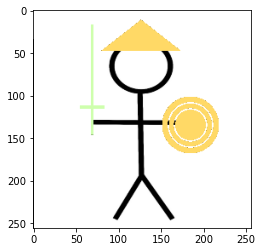

In [418]:
eyes = img_read(1,'./eyes',130,30,17,55)
hat = img_read(1,'./2',40,100,10,77)
shield = img_read(3,'./3',70,70,100,150)

plt.imshow(sword[1])

for i in range(3):
    for j in range(3):
        for k in range(3):
            x = combination(sword[i],main)
            x = combination(hat[j],x)
            x = combination(shield[k],x)
            plt.imshow(x)
            
            plt.savefig('./image/sword%dhat%dshield%d.png'%(i,j,k))
            

In [269]:
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

def normalization(image):
    return (image - image.min())/(image.max() - image.min())
def img_read(num,filepath):
    element = np.zeros((num,1080,1440,3))
    mask = np.zeros((1,1080,1440,3))
    index=0
    for root,dirs,files in os.walk(filepath):
        for file in files:
            #img = cv2.imread()
            if(os.path.splitext(file)[-1]=='.jpg'):
                print(os.path.join(root,file))
                img = cv2.cvtColor(cv2.imread(os.path.join(root,file)), cv2.COLOR_BGR2RGB)
                img = np.uint8(img)
                print(img.shape)

                element[index,:,:,:]=normalization(img)
                index += 1
    return element

def img_read_mask(filepath):
    element = np.zeros((90,1080,1440,3))
    mask = np.zeros((90,1080,1440))
    mask_g = np.zeros((1,1080,1440))
    index=0
    for root,dirs,files in os.walk(filepath):
        for file in files:
            if(file=='mask.jpg'):
                mask_g = generate_mask(os.path.join(root,file))
                continue
        for file in files:
            if(os.path.splitext(file)[-1]=='.jpg' and file!='mask.jpg'):
                print(os.path.join(root,file))
                img = cv2.cvtColor(cv2.imread(os.path.join(root,file)), cv2.COLOR_BGR2RGB)
                img = np.uint8(img)
                element[index,:,:,:]=normalization(img)
                mask[index,:,:] = mask_g
                index += 1
    for i in range(element.shape[0]):
        if(element[i].max()==0):
            print(i)
            element = element[0:i]
            mask = mask[0:i]
            break
    return element,mask

43
(43, 1080, 1440, 3)


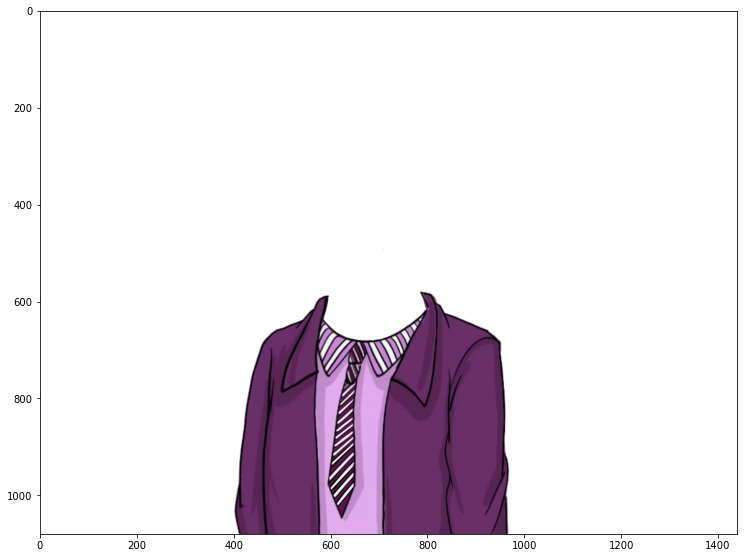

In [205]:
clothes,clothes_mask = img_read_mask('./sheep/clothes/Clothes')
print(clothes.shape)
plt.imshow(clothes[42])


In [284]:
hats = img_read(5,'./sheep/hat')
hairs = img_read(3,'./sheep/hair')
eyes,eyes_mask = img_read_mask('./sheep/eyes')
cheeks = img_read(1,'./sheep/cheek')
heads = img_read(9,'./sheep/head')
clothes,clothes_mask = img_read_mask('./sheep/clothes/Clothes')
backgrounds = img_read(31,'./sheep/background')
necklaces = img_read(1,'./sheep/necklace')


./sheep/hat/812586466034823742.jpg
(1080, 1440, 3)
./sheep/hat/94571063684154194.jpg
(1080, 1440, 3)
./sheep/hat/689843601592079762.jpg
(1080, 1440, 3)
./sheep/hat/754236789186029153.jpg
(1080, 1440, 3)
./sheep/hat/417526429844967164.jpg
(1080, 1440, 3)
./sheep/hair/Hair 2.jpg
(1080, 1440, 3)
./sheep/hair/Hair 3.jpg
(1080, 1440, 3)
./sheep/hair/Hair 1.jpg
(1080, 1440, 3)
./sheep/eyes/五角星/368286789565931413.jpg
./sheep/eyes/新十字眼镜/115812218282574391.jpg
./sheep/eyes/新十字眼镜/185576986589469982.jpg
./sheep/eyes/加号/790343519052706779.jpg
./sheep/eyes/美金/401885783143378689.jpg
./sheep/eyes/地球/819308695213087961.jpg
./sheep/eyes/心/794841833488720156.jpg
./sheep/eyes/心/385711236992626071.jpg
./sheep/eyes/钻石/165530073842291416.jpg
./sheep/eyes/鸣人眼/757587208761669326.jpg
./sheep/eyes/海星/779885604100034349.jpg
./sheep/eyes/火苗/871494276754008927.jpg
./sheep/eyes/闪电/449256395259158123.jpg
./sheep/eyes/x/47064063813272780.jpg
./sheep/eyes/四角星/58171570341621493.jpg
15
./sheep/cheek/10761633100805_.pic.

KeyboardInterrupt: 

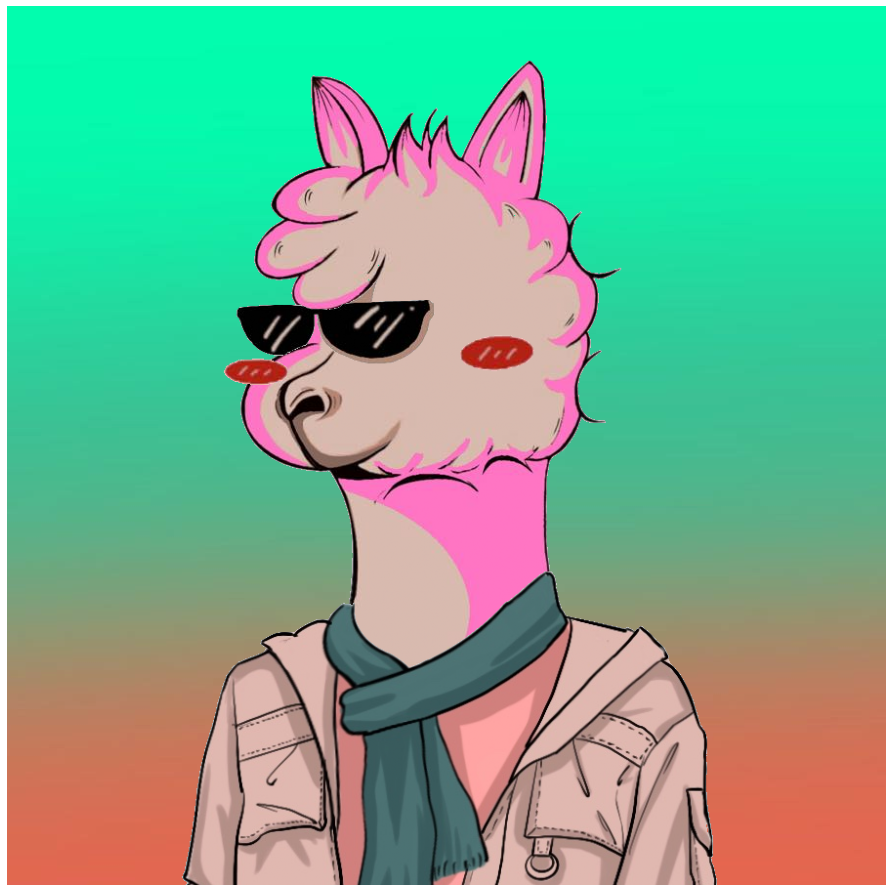

In [106]:
for background in range(backgrounds.shape[0]):
    for head in range(heads.shape[0]):
        for clothe in range(clothes.shape[0]):
             for cheek in range(cheeks.shape[0]):
                for eye in range(eyes.shape[0]):
                    #for hat in range(hats.shape[0]):
                    x = combination(heads[head],backgrounds[background])
                    x = combination(clothes[clothe],x)
                    x = combination(cheeks[cheek],x)
                    x = combination(eyes[eye],x)
                    #x = combination(hats[hat],x)
                    x = x[0:900,237:1137]

                    plt.rcParams['figure.figsize'] = (12.5, 12.5)
                    plt.axis('off')
                    plt.imshow(x)
                    plt.tight_layout()
                    plt.savefig('./sheep/G/eyes%dcheeks%dheads%dclothes%dbackgrounds%d.png'
                                %(eye,cheek,head,clothe,background),bbox_inches='tight',pad_inches=0.0)

#plt.imshow(head[0])


In [11]:
def combination(up,down):
    rows,cols,channels = up.shape
    roi = down
    img2gray = cv2.cvtColor(up.astype('float32'),cv2.COLOR_BGR2GRAY)
    ret,mask = cv2.threshold(img2gray, 0.8,255,cv2.THRESH_BINARY)
    mask = np.uint8(mask)
    mask_inv = cv2.bitwise_not(mask)
    img1_bg = cv2.bitwise_and(roi,roi,mask = mask)
    img2_bg = cv2.bitwise_and(up,up,mask = mask_inv)
    add = cv2.add(img1_bg,img2_bg)
    return add
   

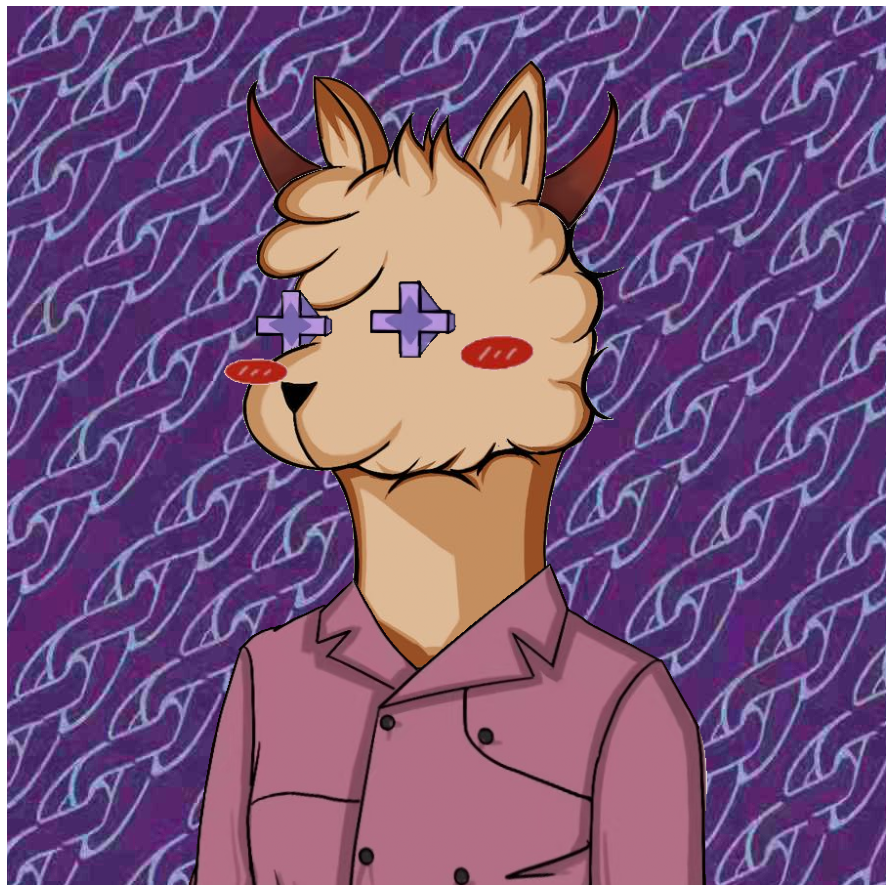

In [278]:
import scipy.ndimage as ndimage
from albumentations import MedianBlur
def generate_mask(filepath):
    img = cv2.cvtColor(cv2.imread(filepath), cv2.COLOR_BGR2RGB)
    img = np.uint8(img)
    img2gray = cv2.cvtColor(img.astype('float32'),cv2.COLOR_BGR2GRAY)
    ret,mask = cv2.threshold(img2gray, 50,255,cv2.THRESH_BINARY)
    mask = np.uint8(mask)
    return mask

def combination_mask(up,down,mask):
    rows,cols,channels = up.shape
    roi = down
    #img2gray = cv2.cvtColor(up.astype('float32'),cv2.COLOR_BGR2GRAY)
    #ret,mask = cv2.threshold(img2gray, 0.8,255,cv2.THRESH_BINARY)
    mask = np.uint8(mask)
    mask_inv = cv2.bitwise_not(mask)
    img1_bg = cv2.bitwise_and(roi,roi,mask = mask)
    img2_bg = cv2.bitwise_and(up,up,mask = mask_inv)
    add = cv2.add(img1_bg,img2_bg)
    return add

heads_mask = generate_mask('./sheep/head.jpg')

x = combination(heads[3],backgrounds[5])
x = combination_mask(clothes[2],x,clothes_mask[2])
x = combination(cheeks[0],x)
a = 1
x = combination_mask(eyes[a],x,eyes_mask[a])
x = combination(hats[0],x)
x = x[0:900,237:1137]

plt.rcParams['figure.figsize'] = (12.5, 12.5)
plt.axis('off')
plt.imshow(x)
plt.tight_layout()
plt.savefig('./sheep/test/test.png',bbox_inches='tight',pad_inches=0.0)


In [223]:
def generate_NFT(backgrounds,heads,clothes,cheeks,eyes,head_mask,clothes_mask,cheeks_mask,eyes_mask):
    for background in range(backgrounds.shape[0]):
        for head in range(heads.shape[0]):
            for clothe in range(clothes.shape[0]):
                 for cheek in range(cheeks.shape[0]):
                    for eye in range(eyes.shape[0]):
                        #for hat in range(hats.shape[0]):
                        x = combination_mask(heads[head],backgrounds[rand(backgrounds)],head_mask)
                        x = combination_mask(clothes[clothe],x,clothes_mask)
                        #x = combination_mask(cheeks[cheek],x,cheeks_mask)
                        x = combination_mask(eyes[eye],eyes_mask)
                        #x = combination(hats[hat],x)
                        x = x[0:900,237:1137]
                        plt.rcParams['figure.figsize'] = (12.5, 12.5)
                        plt.axis('off')
                        plt.imshow(x)
                        plt.tight_layout()
                        plt.savefig('./sheep/G/eyes%dcheeks%dheads%dhoodies%dbackgrounds%d.png'
                                    %(eye,cheek,head,hoodie,background),bbox_inches='tight',pad_inches=0.0)
        
generate_NFT(backgrounds,heads,clothes,eyes,head_mask,clothes_mask,eyes_mask)

NameError: name 'eyes_mask' is not defined

KeyboardInterrupt: 

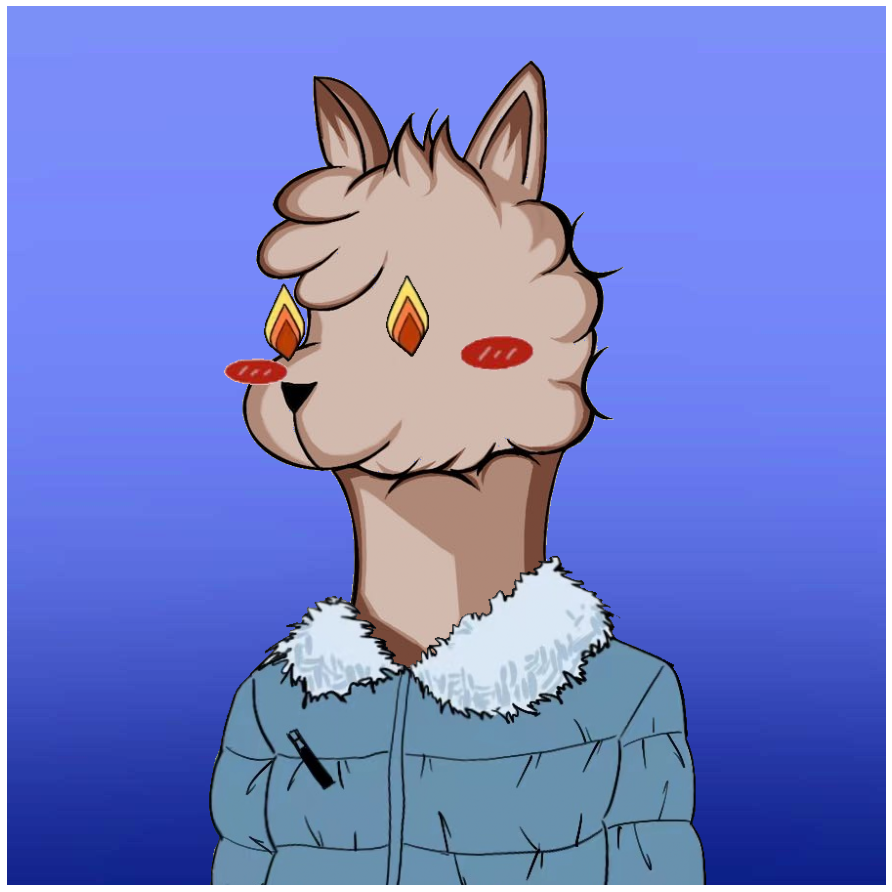

In [285]:
import random

def rand(images):
    x = random.randint(0,images.shape[0]-1)
    return x

def generate_NFT(backgrounds,heads,clothes,cheeks,eyes,clothes_mask):
    for background in range(backgrounds.shape[0]):
        for head in range(heads.shape[0]):
            for clothe in range(clothes.shape[0]):
                 for cheek in range(cheeks.shape[0]):
                    for eye in range(eyes.shape[0]):
                        num = rand(heads)
                        x = combination(heads[num],backgrounds[rand(backgrounds)])
                        num = rand(clothes)
                        x = combination_mask(clothes[num],x,clothes_mask[num])
                        x = combination(cheeks[cheek],x)
                        num = rand(eyes)
                        x = combination_mask(eyes[num],x,eyes_mask[num])
                        #x = combination(hats[hat],x)
                        x = x[0:900,237:1137]
                        plt.rcParams['figure.figsize'] = (12.5, 12.5)
                        plt.axis('off')
                        plt.imshow(x)
                        plt.tight_layout()
                        plt.savefig('./sheep/G/eyes%dcheeks%dheads%dclothes%dbackgrounds%d.png'
                                    %(eye,cheek,head,clothe,background),bbox_inches='tight',pad_inches=0.0)
num = 0   
generate_NFT(backgrounds,heads,clothes,cheeks,eyes,clothes_mask)